<a href="https://colab.research.google.com/github/Darkismaxr/ProyectoIA/blob/main/Entrenamiento_eficiente_de_redes_neuronales_mediante_parametrizaci%C3%B3n_inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento eficiente de redes neuronales mediante parametrización inteligente

Este proyecto implementa una red neuronal con un sistema de parametrización inteligente, enfocado en optimizar automáticamente los hiperparámetros clave del modelo para mejorar su rendimiento.

Como modelo voy a usar redes neuronales y como datos voy a emplear el conjunto de datos Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
# Importamos las bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

from sklearn import  preprocessing # Para el procesado de los datos
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics

###Importamos los datos

In [ ]:
# Cargamos el conjunto de datos
url_datos = 'https://raw.githubusercontent.com/jamaltoutouh/curso-ciencia-de-datos-python/main/breast-cancer.csv'
cancer_dataset = pd.read_csv(url_datos)

print('Atributos del conjunto de datos: ', cancer_dataset.columns)
print('Dimensiones del conjunto de datos',cancer_dataset.shape)

Atributos del conjunto de datos:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Dimensiones del conjunto de datos (569, 33)


In [ ]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###Eliminamos columnas innecesarias

In [ ]:
# Eliminamos las columnas que no aportan datos que son 'id' y 'Unnamed: 32'.
print('\nEliminanos las columnas id  y Unnamed: 32\n')
cancer_dataset = cancer_dataset.drop(['id', 'Unnamed: 32'],axis = 1)

# Mostramos 5 filas de los datos
print('Atributos del conjunto de datos: ', cancer_dataset.columns)
print('Dimensiones del conjunto de datos',cancer_dataset.shape)


Eliminanos las columnas id  y Unnamed: 32

Atributos del conjunto de datos:  Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Dimensiones del conjunto de datos (569, 31)


###Preparamos los datos para ser empleados:

In [ ]:
print('Valores de diagnosis (antes del cambio): \n', cancer_dataset['diagnosis'])

cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('M'),1)
cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('B'),0)

print('Valores de diagnosis (después del cambio):  \n', cancer_dataset['diagnosis'])

Valores de diagnosis (antes del cambio): 
 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
Valores de diagnosis (después del cambio):  
 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


<ipython-input-5-1593eb84e362>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace(('B'),0)


###Selección de la característica
Se van a dividir los datos en dos:

Variables objetivo o dependientes (que querremos predecir). En este caso es el diagnóstico diagnosis
Variables de características o independientes (que emplearemos para la predicción). En este caso todas salvo diagnosis

In [ ]:
X = cancer_dataset.drop('diagnosis', axis=1) # X está definido por todos los atributos salvo diagnosis
y = cancer_dataset['diagnosis']

###Creación de los datos de entrenamiento y de prueba
Para poder evaluar correctamente el rendimiento de los modelos de eprendizaje automátoco se divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba o test.

Así, vamos a dividir el conjunto de datos mediante la función train_test_split() a la que le pasamos cuatro parámetros: las características, el objetivo, la fracción del tamaño del conjunto de test y, además, opcionalmente se puede utilizar random_state para seleccionar los registros de forma aleatoria.

En este caso, el conjunto de test será de un 20% de los datos y no se seleccionarán los registros de forma aleatoria.

In [ ]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=0)

print('Dimensión de X_train: ', X_train.shape)
print('Dimensión de X_test: ', X_test.shape)
print('Dimensión de y_train: ', y_train.shape)
print('Dimensión de y_est: ', y_test.shape)

Dimensión de X_train:  (455, 30)
Dimensión de X_test:  (114, 30)
Dimensión de y_train:  (455,)
Dimensión de y_est:  (114,)


###Creación del Modelo Base y vista de sus parametros

In [ ]:
# Se crea el clasificador logístico
ann_model_basic = neural_network.MLPClassifier(max_iter=1000,random_state=0)

# Mostramos los parámetros por defecto
print('Parámetros por defecto: ', ann_model_basic.get_params())

Parámetros por defecto:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


Seleccionamos los parámentros que queremos modificar a los valores por defecto y la lista de valores posibles. En este caso se va a modificar:
* **hidden_layer_sizes**: estructura de la red. Define cuántas capas ocultas y cuántas neuronas por capa tiene tu red.
* **activation**: Función de activación. Afecta directamente a la no linealidad del modelo.
* **solver**: Algoritmo de optimización. Define cómo se ajustan los pesos de la red neuronal
* **alpha**: Regularización L2. Ayuda a evitar el sobreajuste.
* **learning_rate**: estrategia de tasa de aprendizaje. Controla cuánto cambian los pesos en cada paso del entrenamiento.

Se ha elegido estos parametros porque son los que más impacto tienen en la capacidad de aprendizaje del modelo, la velocidad de entrenamiento, el riesgo de sobreajuste y la estabilidad del proceso de optimización.


In [ ]:
# Definimos los parámetros a configurar
params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}


###Buscador Grid search
Grid Search es una herramienta que nos ayuda a encontrar los mejores hiperparámetros para nuestro modelo.
Lo que hace es probar todas las combinaciones posibles que le demos y ver cuál funciona mejor con nuestros datos de entrenamiento.

Esto se hace usando validación cruzada, y al final nos dice qué combinación de parámetros da mejor resultado según la métrica que elijamos (por ejemplo, f1, accuracy, etc).

Es muy útil porque así no tenemos que ir probando los parámetros a mano, y nos aseguramos de que el modelo esté bien ajustado sin pasarnos (ni quedarnos cortos).

In [ ]:
# Creamos el buscador con GridSearchCV
buscador_grid = model_selection.GridSearchCV(
    estimator=ann_model_basic,
    param_grid=params,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=3
)

# Lanzamos la búsqueda
buscador_grid.fit(X_train, y_train)

# Mostramos los resultados de la búsqueda
print('La mejor configuración encontrada es:', buscador_grid.best_params_)
print('La puntuación de la mejor configuración es:', buscador_grid.best_score_)

# Nos quedamos con el modelo con los mejores parámetros
best_model = buscador_grid.best_estimator_
print('La configuración completa del modelo es:', best_model.get_params())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
La mejor configuración encontrada es: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
La puntuación de la mejor configuración es: 0.9400234530961334
La configuración completa del modelo es: {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


#Testeamos el mejor modelo

In [ ]:
# Empleamos el modelo entrenado con los parámetros óptimos para predecir sobre el test
y_pred = best_model.predict(X_test)

### Evaluación del modelo (Métricas)

Evaluaremos cuatro métricas diferentes empleadas en los problemas de clasificación:

* *Precision*	o precisión
* *Recall* o sensibilidad
* F1-score o indicador F1
* Accuracy o exactitud

In [ ]:
# Calculamos y mostramos las diferentes métricas
precision = metrics.precision_score(y_test, y_pred, average="macro")
sensibilidad = metrics.recall_score(y_test, y_pred, average="macro")
f1_score = metrics.f1_score(y_test, y_pred, average="macro")
exactitud = metrics.accuracy_score(y_test, y_pred)

print('Precisión:', precision)
print('Sensibilidad:', sensibilidad)
print('F1-score:', f1_score)
print('Exactitud:', exactitud)

Precisión: 0.9344906649197511
Sensibilidad: 0.9212448396316291
F1-score: 0.9265700483091788
Exactitud: 0.9298245614035088


###Matriz de confusión

Text(0.5, 427.9555555555555, 'Etiqueta predicha')

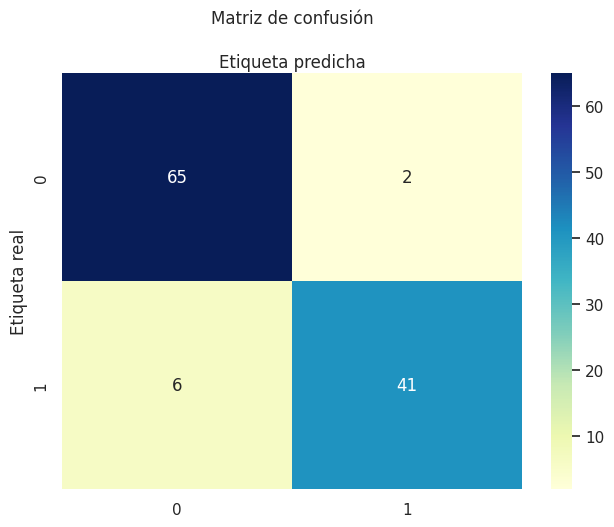

In [ ]:
# Creamos una figura para mostrar la matriz de confusión
y_pred = best_model.predict(X_test)

# Obtenemos y mostramos la matriz de confusión
matriz_confusión = metrics.confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(matriz_confusión), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')